In [195]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
def get_target(target, simtime, simtime2, nsecs, dt):
    amp = 1.3
    freq = 1 / 60

    if target == 'B':
        ft = amp * signal.sawtooth(2 * np.pi * freq * simtime, 0.5)
        ft2 = amp * signal.sawtooth(2 * np.pi * freq * simtime2, 0.5)

    elif target == 'D':
        ft = (amp / 1.0) * np.sin(1.0 * np.pi * freq * simtime) + \
            (amp / 2.0) * np.sin(2.0 * np.pi * freq * simtime) + \
            (amp / 6.0) * np.sin(3.0 * np.pi * freq * simtime) + \
            (amp / 3.0) * np.sin(4.0 * np.pi * freq * simtime)
        ft = ft / 1.5

        ft2 = (amp / 1.0) * np.sin(1.0 * np.pi * freq * simtime2) + \
            (amp / 2.0) * np.sin(2.0 * np.pi * freq * simtime2) + \
            (amp / 6.0) * np.sin(3.0 * np.pi * freq * simtime2) + \
            (amp / 3.0) * np.sin(4.0 * np.pi * freq * simtime2)
        ft2 = ft2 / 1.5

    elif target == 'E':
        # freq *= .2
        ft = (amp / 1.0) * np.sin(1.0 * np.pi * freq * simtime) + \
            (amp / 2.0) * np.sin(2.0 * np.pi * freq * simtime) + \
            (amp / 6.0) * np.sin(3.0 * np.pi * freq * simtime) + \
            (amp / 3.0) * np.sin(4.0 * np.pi * freq * simtime) + \
            (amp / 6.0) * np.sin(5.0 * np.pi * freq * simtime) + \
            (amp / 2.0) * np.sin(6.0 * np.pi * freq * simtime) + \
            (amp / 1.0) * np.sin(7.0 * np.pi * freq * simtime) + \
            (amp / 3.0) * np.sin(8.0 * np.pi * freq * simtime) + \
            (amp / 6.0) * np.sin(9.0 * np.pi * freq * simtime) + \
            (amp / 2.0) * np.sin(10.0 * np.pi * freq * simtime) + \
            (amp / 1.0) * np.sin(11.0 * np.pi * freq * simtime) + \
            (amp / 3.0) * np.sin(12.0 * np.pi * freq * simtime) + \
            (amp / 6.0) * np.sin(13.0 * np.pi * freq * simtime) + \
            (amp / 2.0) * np.sin(14.0 * np.pi * freq * simtime) + \
            (amp / 1.0) * np.sin(15.0 * np.pi * freq * simtime) + \
            (amp / 3.0) * np.sin(16.0 * np.pi * freq * simtime)
        ft = ft / 1.5

        ft2 = (amp / 1.0) * np.sin(1.0 * np.pi * freq * simtime2) + \
            (amp / 2.0) * np.sin(2.0 * np.pi * freq * simtime2) + \
            (amp / 6.0) * np.sin(3.0 * np.pi * freq * simtime2) + \
            (amp / 3.0) * np.sin(4.0 * np.pi * freq * simtime2) + \
            (amp / 6.0) * np.sin(5.0 * np.pi * freq * simtime2) + \
            (amp / 2.0) * np.sin(6.0 * np.pi * freq * simtime2) + \
            (amp / 1.0) * np.sin(7.0 * np.pi * freq * simtime2) + \
            (amp / 3.0) * np.sin(8.0 * np.pi * freq * simtime2) + \
            (amp / 6.0) * np.sin(9.0 * np.pi * freq * simtime2) + \
            (amp / 2.0) * np.sin(10.0 * np.pi * freq * simtime2) + \
            (amp / 1.0) * np.sin(11.0 * np.pi * freq * simtime2) + \
            (amp / 3.0) * np.sin(12.0 * np.pi * freq * simtime2) + \
            (amp / 6.0) * np.sin(13.0 * np.pi * freq * simtime2) + \
            (amp / 2.0) * np.sin(14.0 * np.pi * freq * simtime2) + \
            (amp / 1.0) * np.sin(15.0 * np.pi * freq * simtime2) + \
            (amp / 3.0) * np.sin(16.0 * np.pi * freq * simtime2)
        ft2 = ft2 / 1.5

    elif target == 'F':
        ft = (amp / 1.0) * np.sin(1.0 * np.pi * freq * simtime) + \
            (amp / 2.0) * np.sin(2.0 * np.pi * freq * simtime) + \
            (amp / 6.0) * np.sin(3.0 * np.pi * freq * simtime) + \
            (amp / 3.0) * np.sin(4.0 * np.pi * freq * simtime)
        ft = ft / 1.5
        ft += np.random.normal(0, .2, simtime.shape)

        ft2 = (amp / 1.0) * np.sin(1.0 * np.pi * freq * simtime2) + \
            (amp / 2.0) * np.sin(2.0 * np.pi * freq * simtime2) + \
            (amp / 6.0) * np.sin(3.0 * np.pi * freq * simtime2) + \
            (amp / 3.0) * np.sin(4.0 * np.pi * freq * simtime2)
        ft2 = ft2 / 1.5
        ft2 += np.random.normal(0, .2, simtime2.shape)

    elif target == 'G':
        ft = amp * signal.square(2 * np.pi * freq * simtime)
        ft2 = amp * signal.square(2 * np.pi * freq * simtime2)

    elif target == 'Ia':
        ft = (amp / 1.0) * np.sin(1.0 * np.pi * (freq * 2) * simtime) / 1.5
        ft2 = (amp / 1.0) * np.sin(1.0 * np.pi * (freq * 2) * simtime2) / 1.5

    elif target == 'Ib':
        ft = (amp / 2.0) * np.sin(2.0 * np.pi * (1 / (nsecs * dt)) * simtime) / 1.5
        ft2 = (amp / 2.0) * np.sin(2.0 * np.pi * (1 / (nsecs * dt)) * simtime2) / 1.5
    
    else:
        print("No target function specified")
        ft, ft2 = None, None

    return ft, ft2

In [ ]:
def force(target=None, nsecs=1440, logging=False):
    # Parameters
    N = 1000
    p = 0.1
    dt = 0.1
    alpha = 1.0
    nsecs = nsecs
    learn_every = 2
    
    if target:
        g = 1.5
    else:
        g = 2.5

    # Derived parameters
    scale = 1.0 / np.sqrt(p * N)
    M = np.random.randn(N, N) * (np.random.rand(N, N) < p) * g * scale
    nRec2Out = N
    wo = np.random.rand(nRec2Out, 1) - 0.5
    wf = 2.0 * (np.random.rand(N, 1) - 0.5)

    print(f'N: {N}')
    print(f'g: {g}')
    print(f'p: {p}')
    print(f'nRec2Out: {nRec2Out}')
    print(f'alpha: {alpha}')
    print(f'nsecs: {nsecs}')
    print(f'learn_every: {learn_every}')

    # Simulation time
    simtime = np.arange(0, nsecs, dt)
    simtime2 = np.arange(nsecs, 1.25 * nsecs, dt)

    # Initialize variables
    wo_len = np.zeros_like(simtime)
    zt = np.zeros_like(simtime)
    zpt = np.zeros_like(simtime2)
    x = 0.5 * np.random.randn(N, 1)
    z = 0.5 * np.random.randn(1, 1)

    P = (1.0 / alpha) * np.eye(nRec2Out)

    # Get target function
    ft, ft2 = get_target(target, simtime, simtime2, nsecs, dt)

    # Training phase
    WO = []

    for ti, t in enumerate(simtime):
        if ti % (nsecs // 2) == 0:
        
            if logging and ti % (nsecs // 100) == 0:
                print(f'time: {t:.3f}')
                plt.figure(figsize=(12, 8))
                plt.subplot(2, 1, 1)
                plt.plot(simtime, ft, label='f', linewidth=1, color='green')
                plt.plot(simtime, zt, label='z', linewidth=1, color='red')
                plt.title('Training', fontsize=14, fontweight='bold')
                plt.xlabel('Time', fontsize=14, fontweight='bold')
                plt.ylabel('f and z', fontsize=14, fontweight='bold')
                plt.legend()
                
                plt.subplot(2, 1, 2)
                plt.plot(simtime, wo_len, label='|w|', linewidth=1)
                plt.xlabel('Time', fontsize=14, fontweight='bold')
                plt.ylabel('|w|', fontsize=14, fontweight='bold')
                plt.legend()
                plt.tight_layout()
                plt.show()
 
        
        # Network simulation step
        x = (1.0 - dt) * x + M @ (np.tanh(x) * dt) + wf * (z * dt)
        r = np.tanh(x)
        z = wo.T @ r

        if target and ti % learn_every == 0:
            # Update inverse correlation matrix
            k = P @ r
            rPr = r.T @ k
            c = 1.0 / (1.0 + rPr)
            P = P - k @ (k.T * c)
            
            # Update the error for the linear readout
            e = z - ft[ti]
            
            # Update the output weights
            dw = -e * k * c
            wo = wo + dw

            WO.append(wo.flatten())
        
        # Store the output of the system)
        zt[ti] = z[0][0]
        wo_len[ti] = np.linalg.norm(wo)

    # Calculate training error
    if target and logging:
        error_avg = np.mean(np.abs(zt - ft))
        print(f'Training MAE: {error_avg:.3f}')

    # Testing phase
    R = np.zeros((N, len(simtime2)))

    for ti, t in enumerate(simtime2):
        x = (1.0 - dt) * x + M @ (np.tanh(x) * dt) + wf * (z * dt)
        r = np.tanh(x)
        R[:, ti] = r[:, 0]
        z = wo.T @ r
        zpt[ti] = z[0][0]

    # Calculate testing error
    if target and logging:
        error_avg = np.mean(np.abs(zpt - ft2))
        print(f'Testing MAE: {error_avg:.3f}')

    # Plotting results
    if target:
        plt.figure(figsize=(12, 4))
        plt.plot(simtime, ft, label='f', linewidth=3, color='green')
        plt.plot(simtime, zt, label='z', linewidth=3, color='red')
        plt.title('Training', fontsize=14, fontweight='bold')
        plt.xlabel('Time', fontsize=14, fontweight='bold')
        plt.ylabel('f and z', fontsize=14, fontweight='bold')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # calculate array of differences for |w|
        wdot = np.abs(np.diff(wo_len))
        plt.figure(figsize=(12, 4))
        plt.plot(simtime[:-1], wdot, label='|w|', linewidth=1)
        plt.title('Change in |w|', fontsize=14, fontweight='bold')
        plt.xlabel('Time', fontsize=14, fontweight='bold')
        plt.ylabel(r'$|\dot{w}|$', fontsize=14, fontweight='bold')
        plt.legend()
        plt.tight_layout()
        plt.show()

    plt.figure(figsize=(12, 4))
    if target:
        plt.plot(simtime2, ft2, label='f', linewidth=3, color='green')
    plt.plot(simtime2, zpt, label='z', linewidth=3, color='red')
    plt.title('Simulation', fontsize=14, fontweight='bold')
    plt.xlabel('Time', fontsize=14, fontweight='bold')
    plt.ylabel('f and z', fontsize=14, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return zpt, R, wo, WO

N: 1000
g: 2.5
p: 0.1
nRec2Out: 1000
alpha: 1.0
nsecs: 300
learn_every: 2
No target function specified


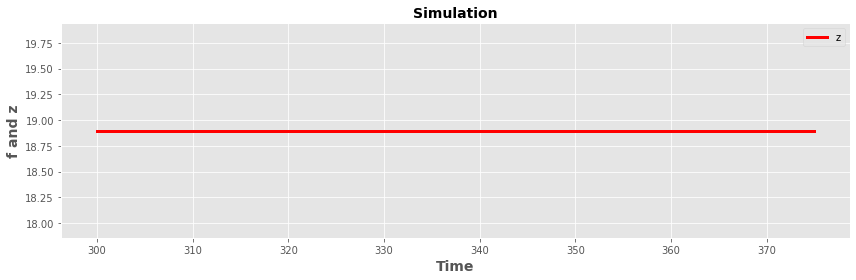

In [198]:
_, _, _, _ = force(nsecs=300)

N: 1000
g: 1.5
p: 0.1
nRec2Out: 1000
alpha: 1.0
nsecs: 1440
learn_every: 2


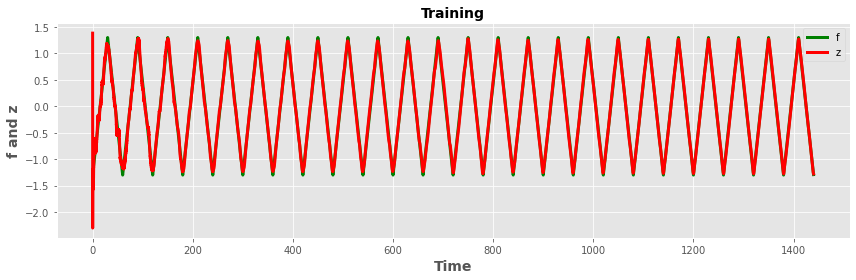

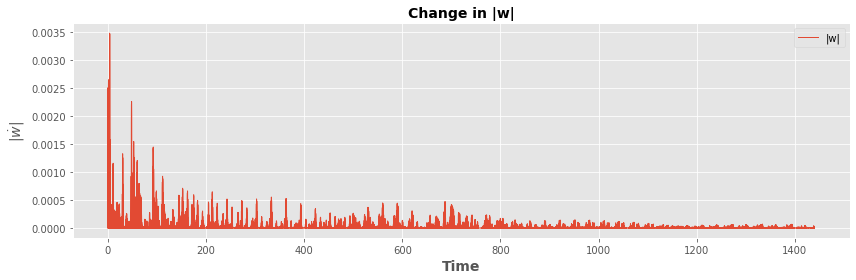

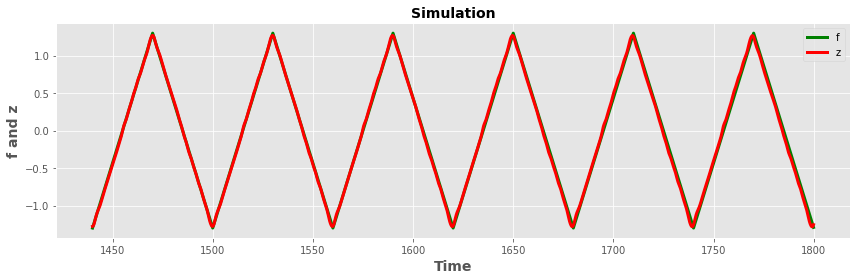

In [199]:
_, _, _, _ = force(target='B')

In [200]:
zpt, R, wo, wo_proj = force('D', nsecs=3600)

N: 1000
g: 1.5
p: 0.1
nRec2Out: 1000
alpha: 1.0
nsecs: 3600
learn_every: 2


KeyboardInterrupt: 

R: (1000, 9000)


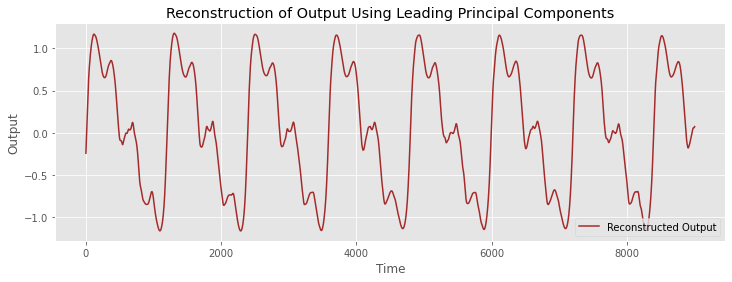

In [ ]:
print('R:', R.shape)
scaler = StandardScaler()
R_scaled = scaler.fit_transform(R.T)

# Perform PCA on neural activities (R)
pca_r = PCA(n_components=8)
R_pca = pca_r.fit_transform(R_scaled)

# Project the original activities onto the leading principal components
reconstruction = pca_r.inverse_transform(R_pca)

# Inverse transform the standardized data back to original scale
reconstruction = scaler.inverse_transform(reconstruction)

# Reconstruct the output using the projected activities
zr = np.dot(reconstruction, wo)

# make sure the lengths are the same
zr = zr[:len(zpt) + 1]

# Plot the original and reconstructed outputs
plt.figure(figsize=(12, 4))
# plt.plot(zpt, label='Original Output', color='red')
plt.plot(zr, label='Reconstructed Output', color='brown')
plt.title('Reconstruction of Output Using Leading Principal Components')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.show()

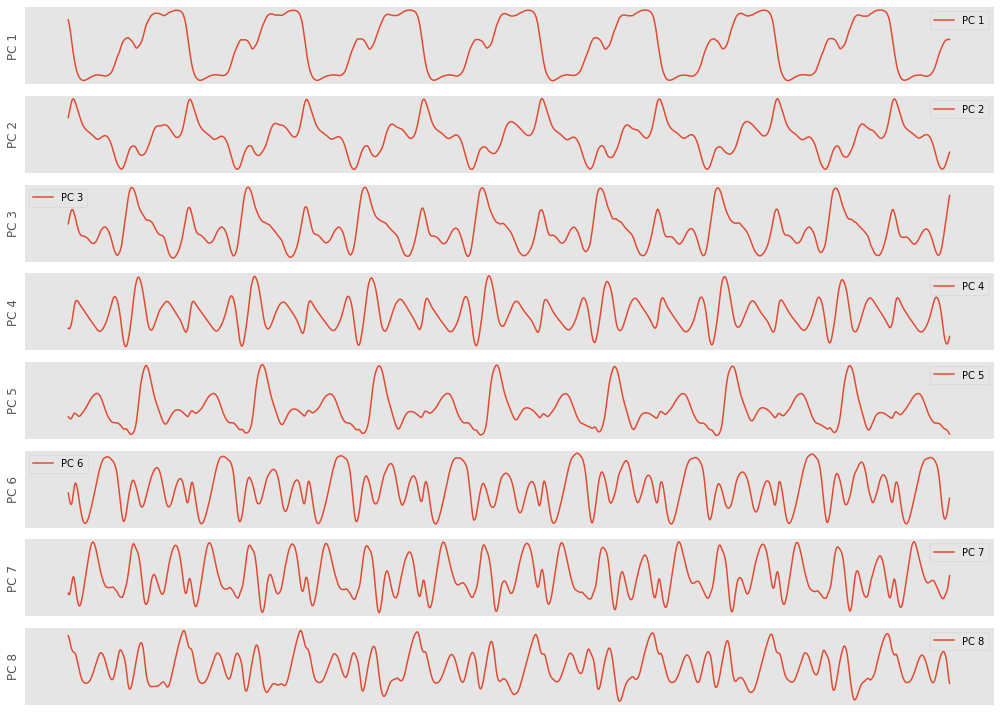

In [ ]:
# Standardize the data
scaler = StandardScaler()
R_scaled = scaler.fit_transform(R.T)

# Perform PCA on standardized neural activities (R)
pca_r = PCA(n_components=8)
R_pca = pca_r.fit_transform(R_scaled)

# Plot the projections of network activity onto the leading eight PC vectors
plt.figure(figsize=(14, 10))
for i in range(8):
    plt.subplot(8, 1, i + 1)
    plt.plot(R_pca[:, i], label=f'PC {i + 1}')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(f'PC {i + 1}')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

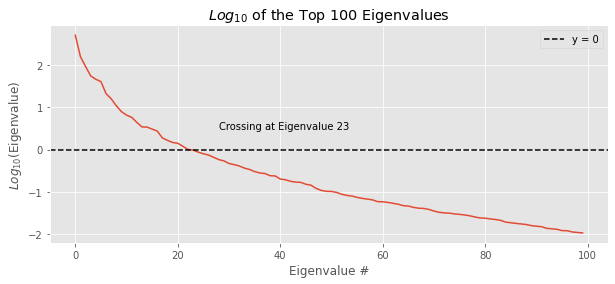

In [ ]:
# Standardize the data
scaler = StandardScaler()
R_scaled = scaler.fit_transform(R.T)

# Perform PCA on standardized neural activities (R)
pca_r = PCA()
R_pca = pca_r.fit_transform(R_scaled)

# Extract eigenvalues
eigenvalues = pca_r.explained_variance_

# Get the top 100 eigenvalues
top_eigenvalues = eigenvalues[:100]

# Plot the log_10 of the top 100 eigenvalues
plt.figure(figsize=(10, 4))
plt.plot(np.log10(top_eigenvalues))
plt.axhline(y=0, color='k', linestyle='--', label='y = 0')

# Find the crossing point where log10(eigenvalues) first crosses below zero
crossing_index = np.where(np.log10(top_eigenvalues) < 0)[0][0]

# Annotate the crossing point
plt.annotate(f'Crossing at Eigenvalue {crossing_index}', xy=(crossing_index, np.log10(top_eigenvalues[crossing_index])), 
             xytext=(crossing_index + 5, np.log10(top_eigenvalues[crossing_index]) + 0.5))

plt.title(r'$Log_{10}$ of the Top 100 Eigenvalues')
plt.xlabel('Eigenvalue #')
plt.ylabel(r'$Log_{10}$(Eigenvalue)')
plt.legend()
plt.grid(True)
plt.show()

N: 1000
g: 1.5
p: 0.1
nRec2Out: 1000
alpha: 1.0
nsecs: 3600
learn_every: 2


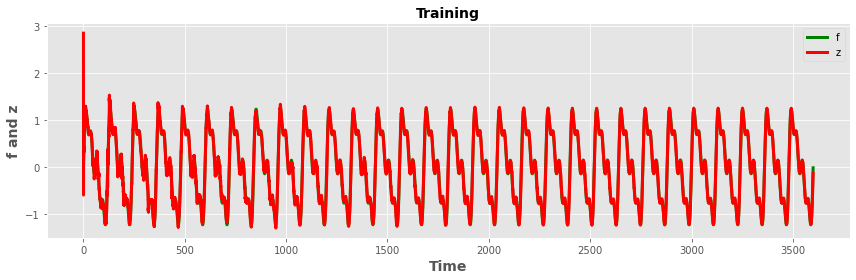

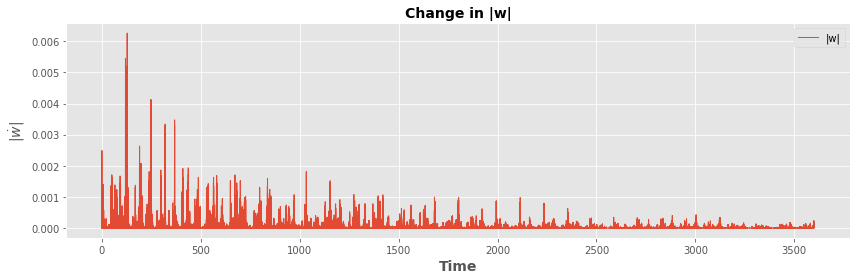

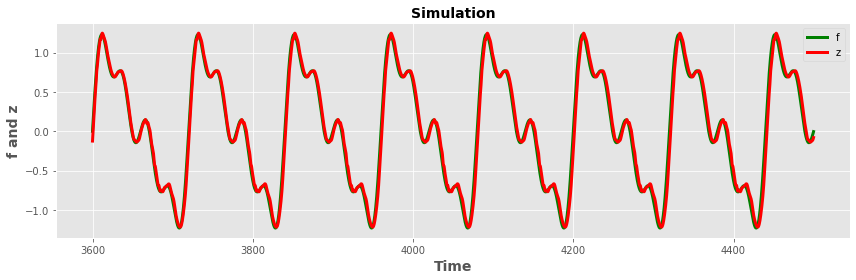

N: 1000
g: 1.5
p: 0.1
nRec2Out: 1000
alpha: 1.0
nsecs: 3600
learn_every: 2


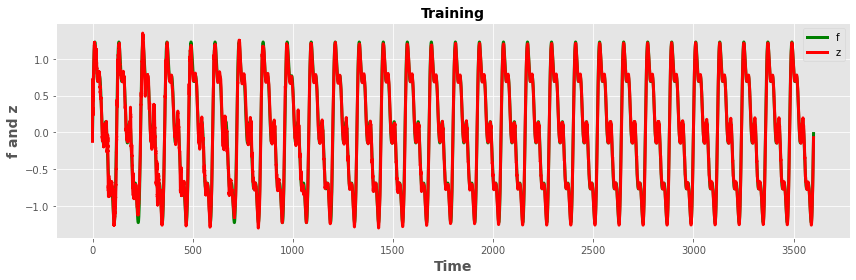

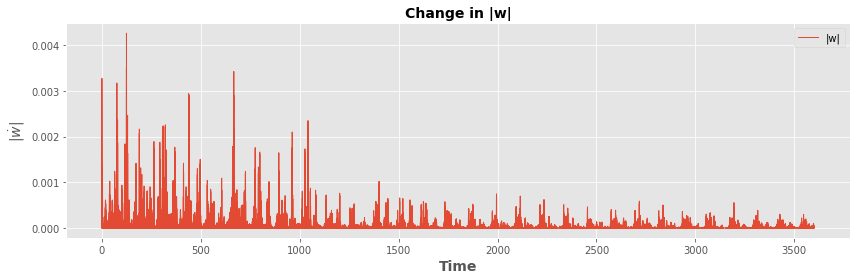

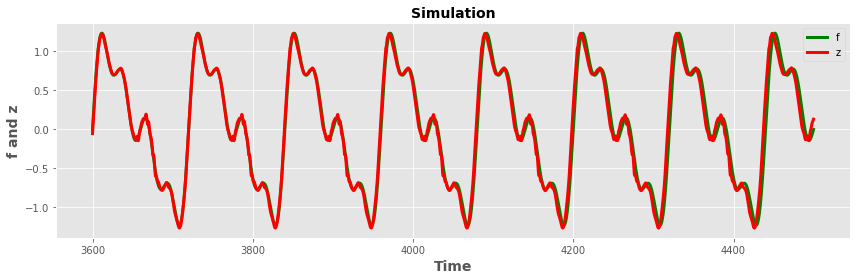

N: 1000
g: 1.5
p: 0.1
nRec2Out: 1000
alpha: 1.0
nsecs: 3600
learn_every: 2


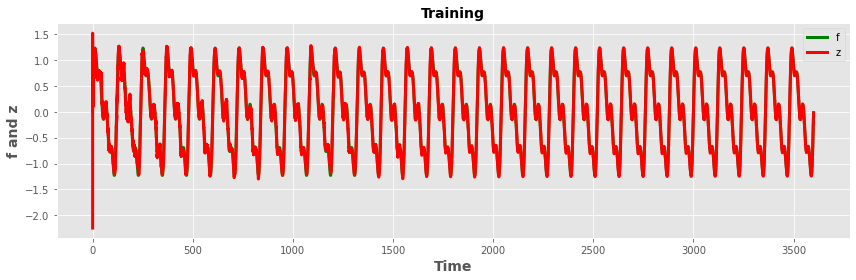

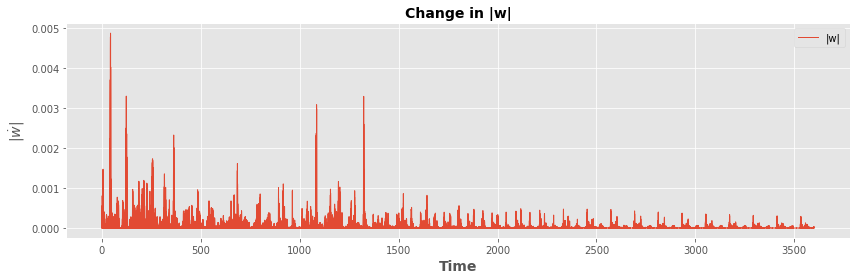

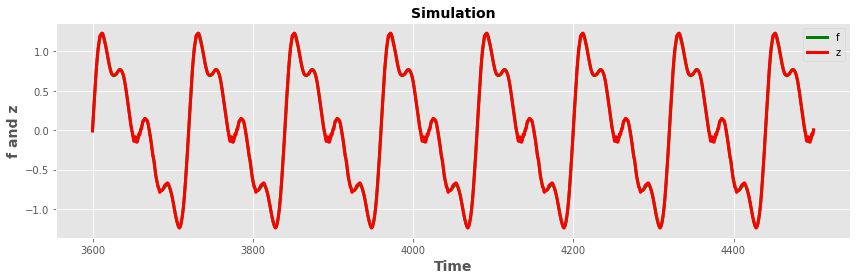

N: 1000
g: 1.5
p: 0.1
nRec2Out: 1000
alpha: 1.0
nsecs: 3600
learn_every: 2


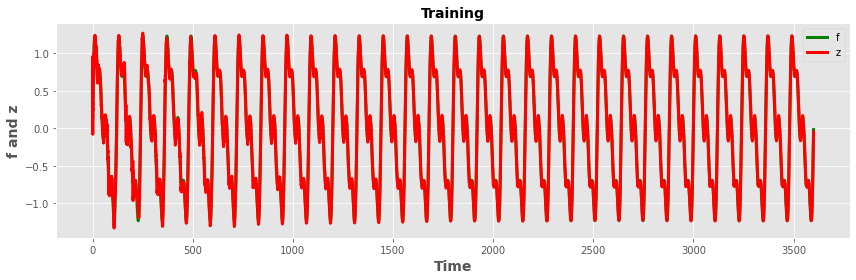

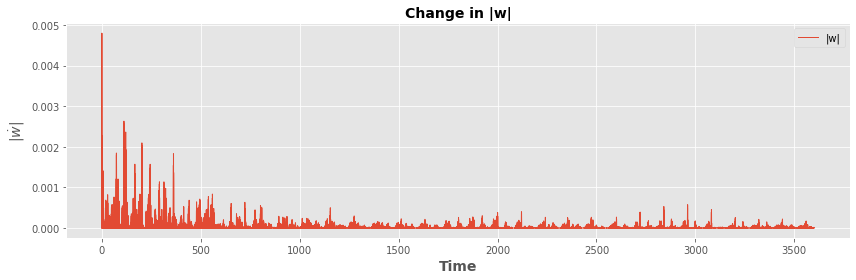

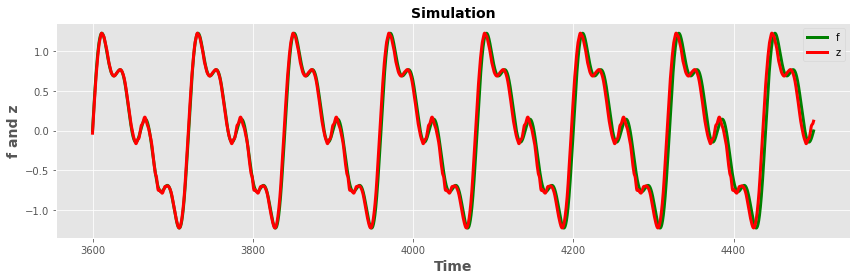

N: 1000
g: 1.5
p: 0.1
nRec2Out: 1000
alpha: 1.0
nsecs: 3600
learn_every: 2


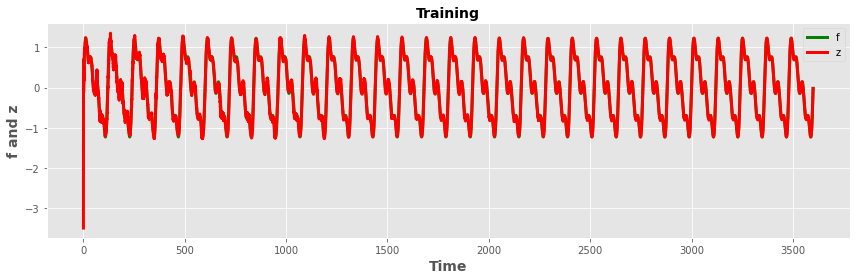

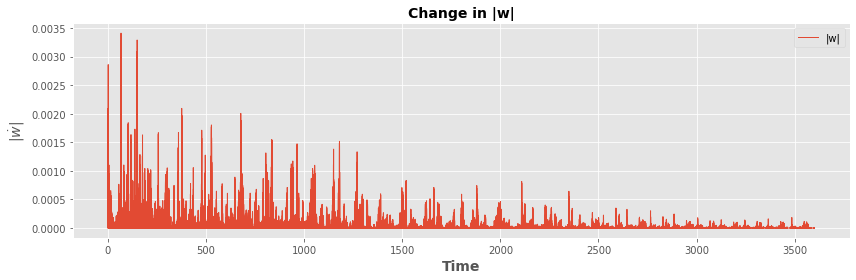

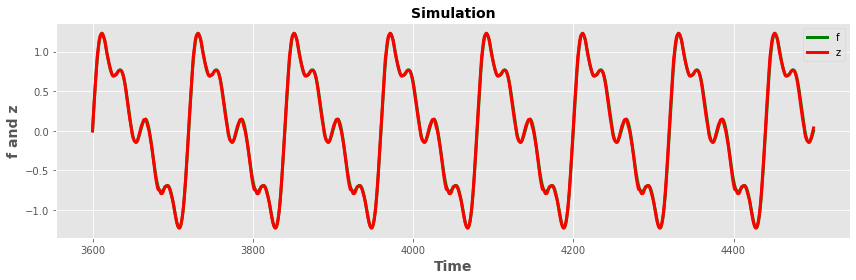

In [203]:
WOs = []
for i in range(5):
    _, R, _, WO = force('D', nsecs=3600)
    WO = np.array(WO)
    scaler = StandardScaler()
    R_scaled = scaler.fit_transform(R.T)
    pca_r = PCA(n_components=2)
    R_pca = pca_r.fit_transform(R_scaled)
    WOs.append(pca_r.transform(WO))

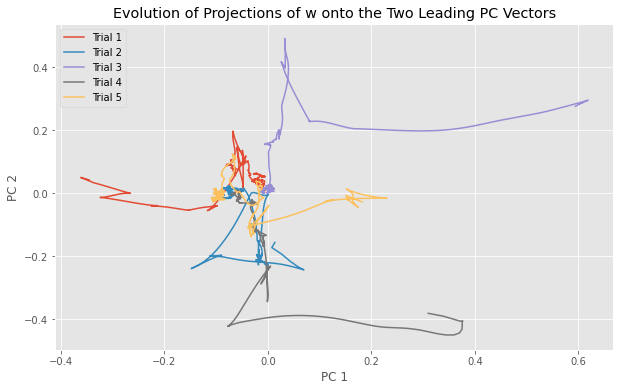

In [204]:
plt.figure(figsize=(10, 6))

for i, wo_proj in enumerate(WOs):
    plt.plot(wo_proj[:, 0], wo_proj[:, 1], label=f'Trial {i+1}')

plt.title('Evolution of Projections of w onto the Two Leading PC Vectors')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid(True)
plt.show()

N: 1000
g: 1.5
p: 0.1
nRec2Out: 1000
alpha: 1.0
nsecs: 2880
learn_every: 2
yup


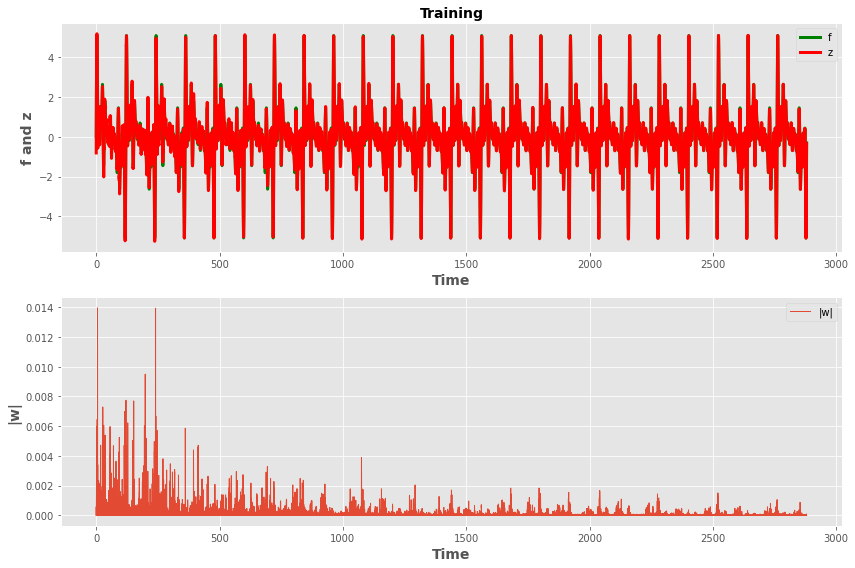

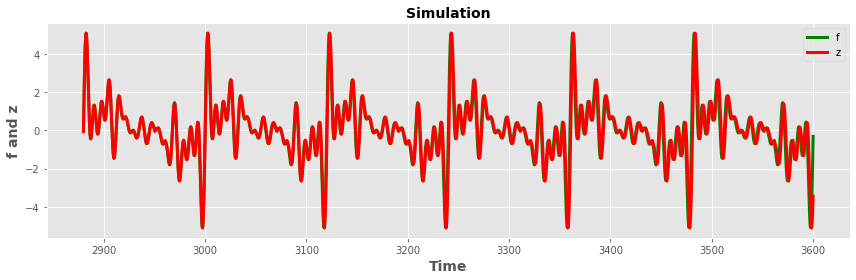

In [96]:
_, _, _, _ = force('E', nsecs=2880)

N: 1000
g: 1.5
p: 0.1
nRec2Out: 1000
alpha: 1.0
nsecs: 3600
learn_every: 2


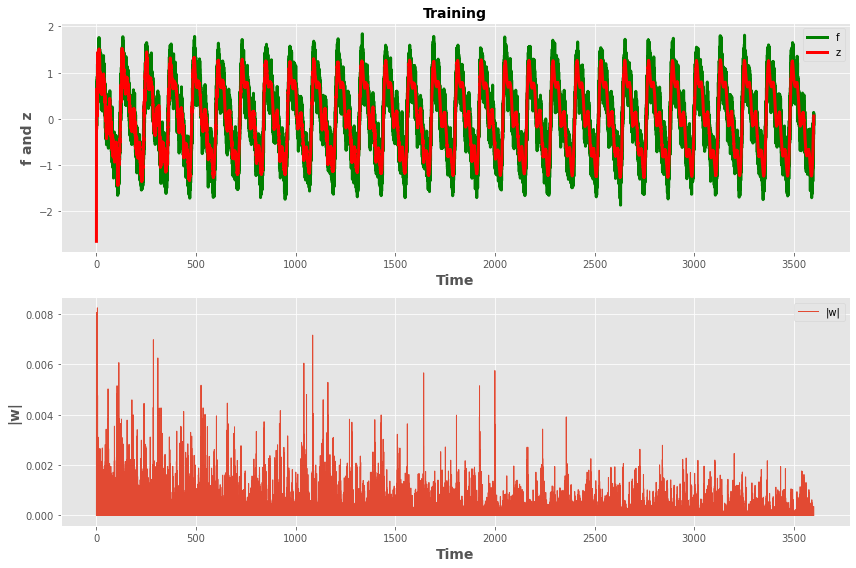

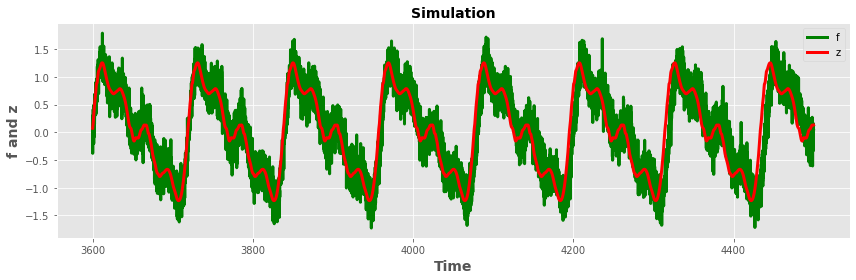

In [107]:
_, _, _, _ = force('F', nsecs=3600)

N: 1000
g: 1.5
p: 0.1
nRec2Out: 1000
alpha: 1.0
nsecs: 1440
learn_every: 2


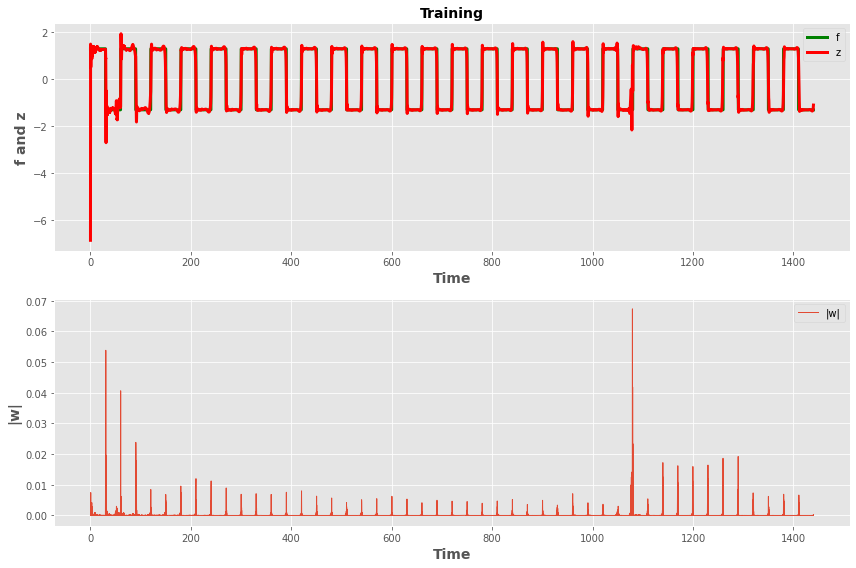

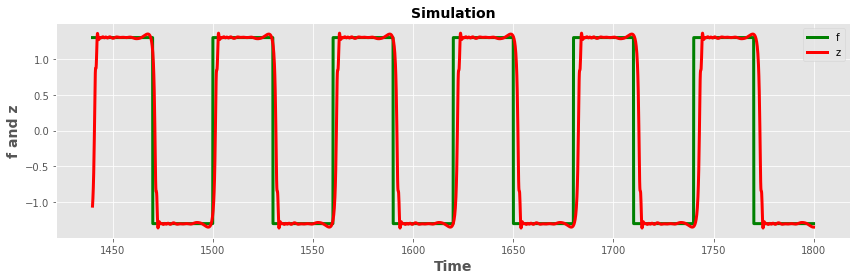

array([[ 0.98566965],
       [ 0.75642948],
       [-0.34794245],
       [-0.72896002],
       [ 0.33387127],
       [-0.94386956],
       [ 0.33127092],
       [-0.9724572 ],
       [ 0.60001289],
       [-0.89918182],
       [ 0.59869839],
       [ 0.78417566],
       [ 0.34424216],
       [-0.95261861],
       [-0.76636058],
       [ 0.99687854],
       [ 0.85772378],
       [ 0.76986181],
       [-0.11333381],
       [-0.78222442],
       [ 0.95877276],
       [-0.99862828],
       [ 0.17270956],
       [ 0.81935665],
       [ 0.62017547],
       [-0.63305806],
       [ 0.09108686],
       [-0.77378143],
       [-0.97904596],
       [-0.7937349 ],
       [ 0.30130501],
       [-0.77552463],
       [ 0.93016246],
       [ 0.4961769 ],
       [ 0.51503456],
       [-0.65234303],
       [-0.76084865],
       [ 0.9084026 ],
       [ 0.82495216],
       [-0.89922617],
       [-0.67453868],
       [ 0.67785158],
       [ 0.91389659],
       [-0.61829703],
       [-0.03719856],
       [ 0

In [109]:
_, _, _, _ = force('G')

N: 1000
g: 1.5
p: 0.1
nRec2Out: 1000
alpha: 1.0
nsecs: 1440
learn_every: 2


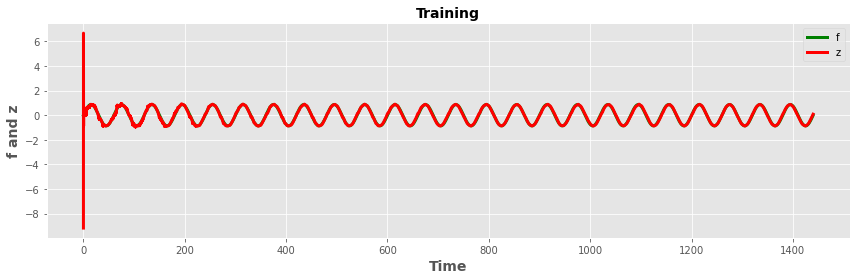

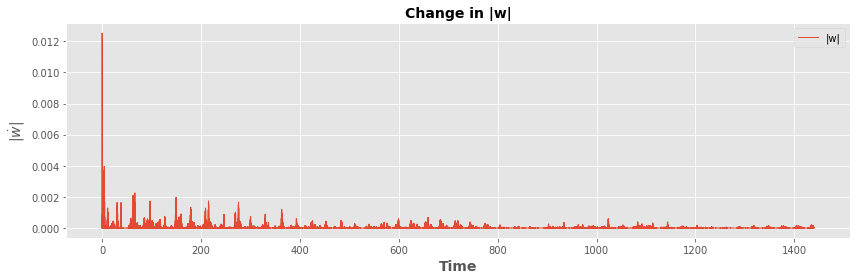

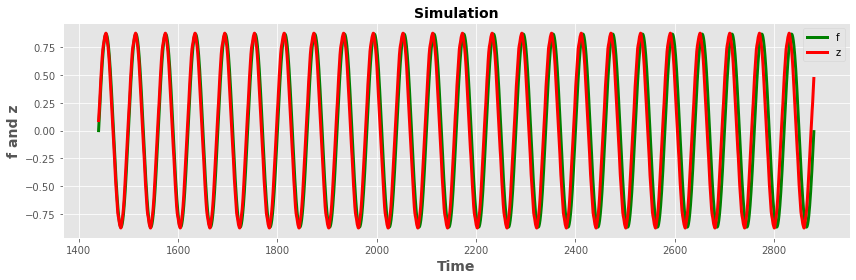

In [124]:
_, _, _, _ = force('Ia')

N: 1000
g: 1.5
p: 0.1
nRec2Out: 1000
alpha: 1.0
nsecs: 1440
learn_every: 2
time: 0.000


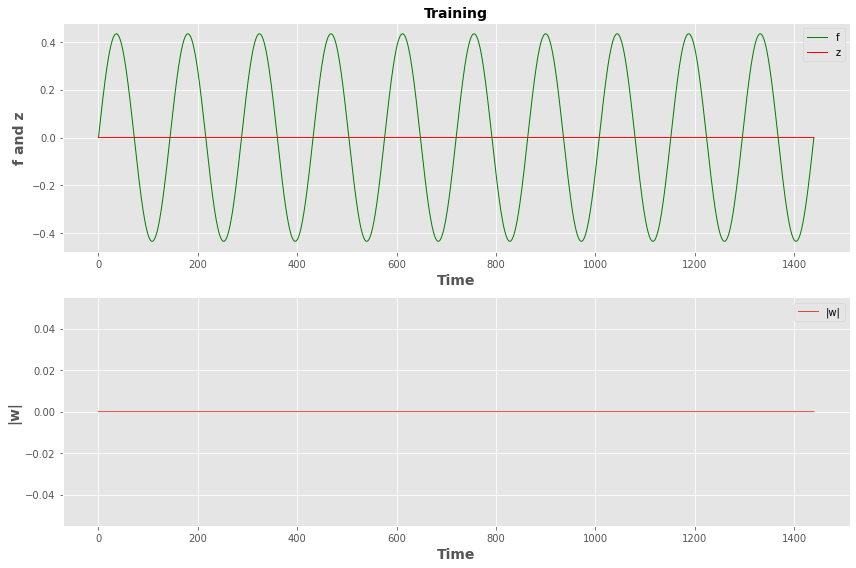

time: 504.000


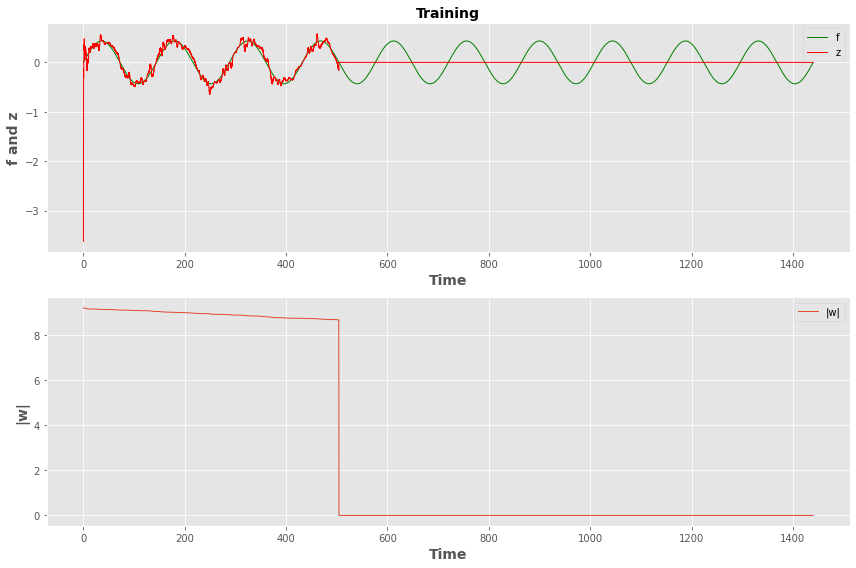

time: 1008.000


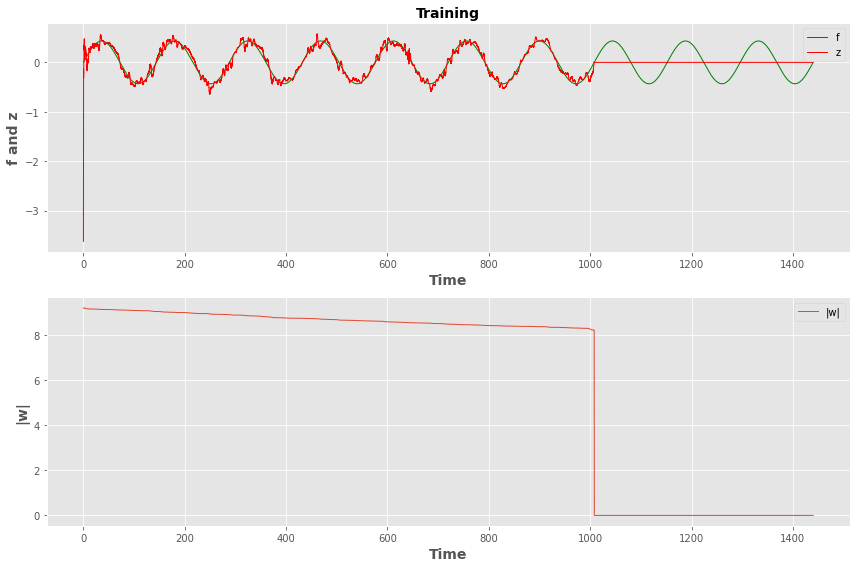

Training MAE: 0.058
Testing MAE: 0.143


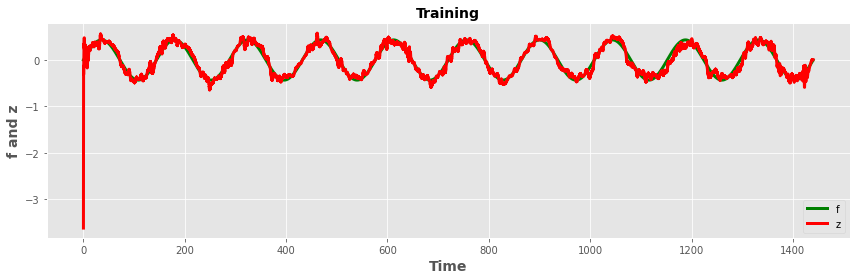

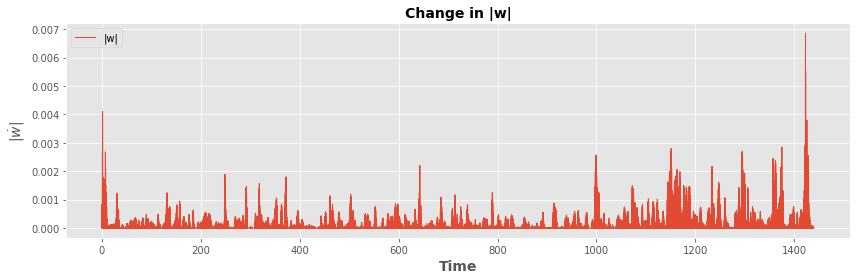

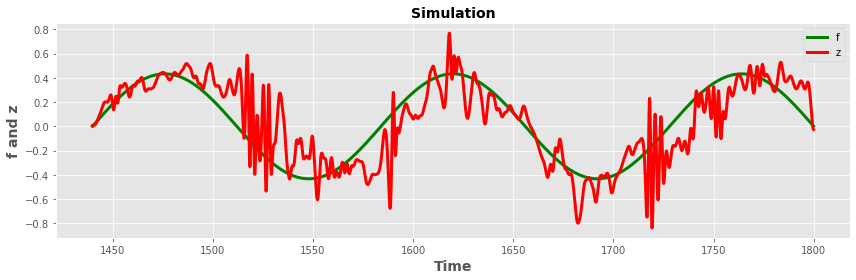

In [139]:
_, _, _, _ = force('Ib')